In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/Dados_commodities_mensal_nova.csv', sep=';', on_bad_lines='warn')

In [4]:
df

,TIPO_INDICE,CO_ANO,CO_MES,CO_COMMODITIES,INDICE,TIPO,TIPO_MOEDA,NO_COMMODITIES,NO_TIPO_CLASSIFICACAO,NO_CLASSIFICACAO_MIN
0,PRECO,2024,12,COMMODITIES_CO_GRUPO_4,"119,99877083983135",CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis
1,PRECO,2024,12,COMMODITIES_CO_GRUPO_2,"141,50202769961788",CORRENTE,USD,Matérias-Primas Agrícolas,COMMODITIES,Matérias-Primas Agrícolas
2,PRECO,2024,12,COMMODITIES_CO_GRUPO_3,"186,03067015795551",CORRENTE,USD,"Minerais, Minérios E Metais",COMMODITIES,"Minerais, Minérios e Metais"
3,PRECO,2024,12,COMMODITIES_CO_GRUPO_1,"180,29747355381787",CORRENTE,USD,Todos Alimentos,COMMODITIES,Todos Alimentos
4,PRECO,2024,12,COMMODITIES_TOTAL_1,"160,28639354962223",CORRENTE,USD,Total Commodities,COMMODITIES,Total Commodities
...,...,...,...,...,...,...,...,...,...,...
9643,PRECO,1998,1,COMMODITIES_TOTAL_1,"42,64480995344425",IMP,USD,Total Commodities,COMMODITIES,Total Commodities
9644,QUANTUM,1998,1,COMMODITIES_CO_GRUPO_2,"155,14675915346666",IMP,USD,Matérias-Primas Agrícolas,COMMODITIES,Matérias-Primas Agrícolas
9645,QUANTUM,1998,1,COMMODITIES_CO_GRUPO_3,"58,37790758508214",IMP,USD,"Minerais, Minérios E Metais",COMMODITIES,"Minerais, Minérios e Metais"
9646,QUANTUM,1998,1,COMMODITIES_CO_GRUPO_1,"145,25564575150008",IMP,USD,Todos Alimentos,COMMODITIES,Todos Alimentos


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TIPO_INDICE            9648 non-null   object
 1   CO_ANO                 9648 non-null   int64 
 2   CO_MES                 9648 non-null   int64 
 3   CO_COMMODITIES         9648 non-null   object
 4   INDICE                 9648 non-null   object
 5   TIPO                   9648 non-null   object
 6   TIPO_MOEDA             9648 non-null   object
 7   NO_COMMODITIES         9648 non-null   object
 8   NO_TIPO_CLASSIFICACAO  9648 non-null   object
 9   NO_CLASSIFICACAO_MIN   9648 non-null   object
dtypes: int64(2), object(8)
memory usage: 753.9+ KB


In [6]:
def get_cat_cols(df):
  cat_cols = []

  for col in df.columns:
    if df[col].dtype == 'object':
      cat_cols.append(col)

  return cat_cols


def get_num_cols(df):
  num_cols = []

  for col in df.columns:
    if df[col].dtype != 'object':
      num_cols.append(col)

  return num_cols


def print_cat_cols(cat_cols_array):
  for cat in cat_cols_array:
    print(f'Coluna {cat}: {df[cat].unique()}')
    print()

In [7]:
cat_cols = get_cat_cols(df)
print_cat_cols(cat_cols)

Coluna TIPO_INDICE: ['PRECO' 'QUANTUM']

Coluna CO_COMMODITIES: ['COMMODITIES_CO_GRUPO_4' 'COMMODITIES_CO_GRUPO_2'
 'COMMODITIES_CO_GRUPO_3' 'COMMODITIES_CO_GRUPO_1' 'COMMODITIES_TOTAL_1']

Coluna INDICE: ['119,99877083983135' '141,50202769961788' '186,03067015795551' ...
 '58,37790758508214' '145,25564575150008' '115,89236396419047']

Coluna TIPO: ['CORRENTE' 'EXP' 'IMP']

Coluna TIPO_MOEDA: ['USD']

Coluna NO_COMMODITIES: ['Combustíveis' 'Matérias-Primas Agrícolas' 'Minerais, Minérios E Metais'
 'Todos Alimentos' 'Total Commodities']

Coluna NO_TIPO_CLASSIFICACAO: ['COMMODITIES']

Coluna NO_CLASSIFICACAO_MIN: ['Combustíveis' 'Matérias-Primas Agrícolas' 'Minerais, Minérios e Metais'
 'Todos Alimentos' 'Total Commodities']



- Column **INDICE** should not be *object*

In [8]:
cat_cols.remove('INDICE')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

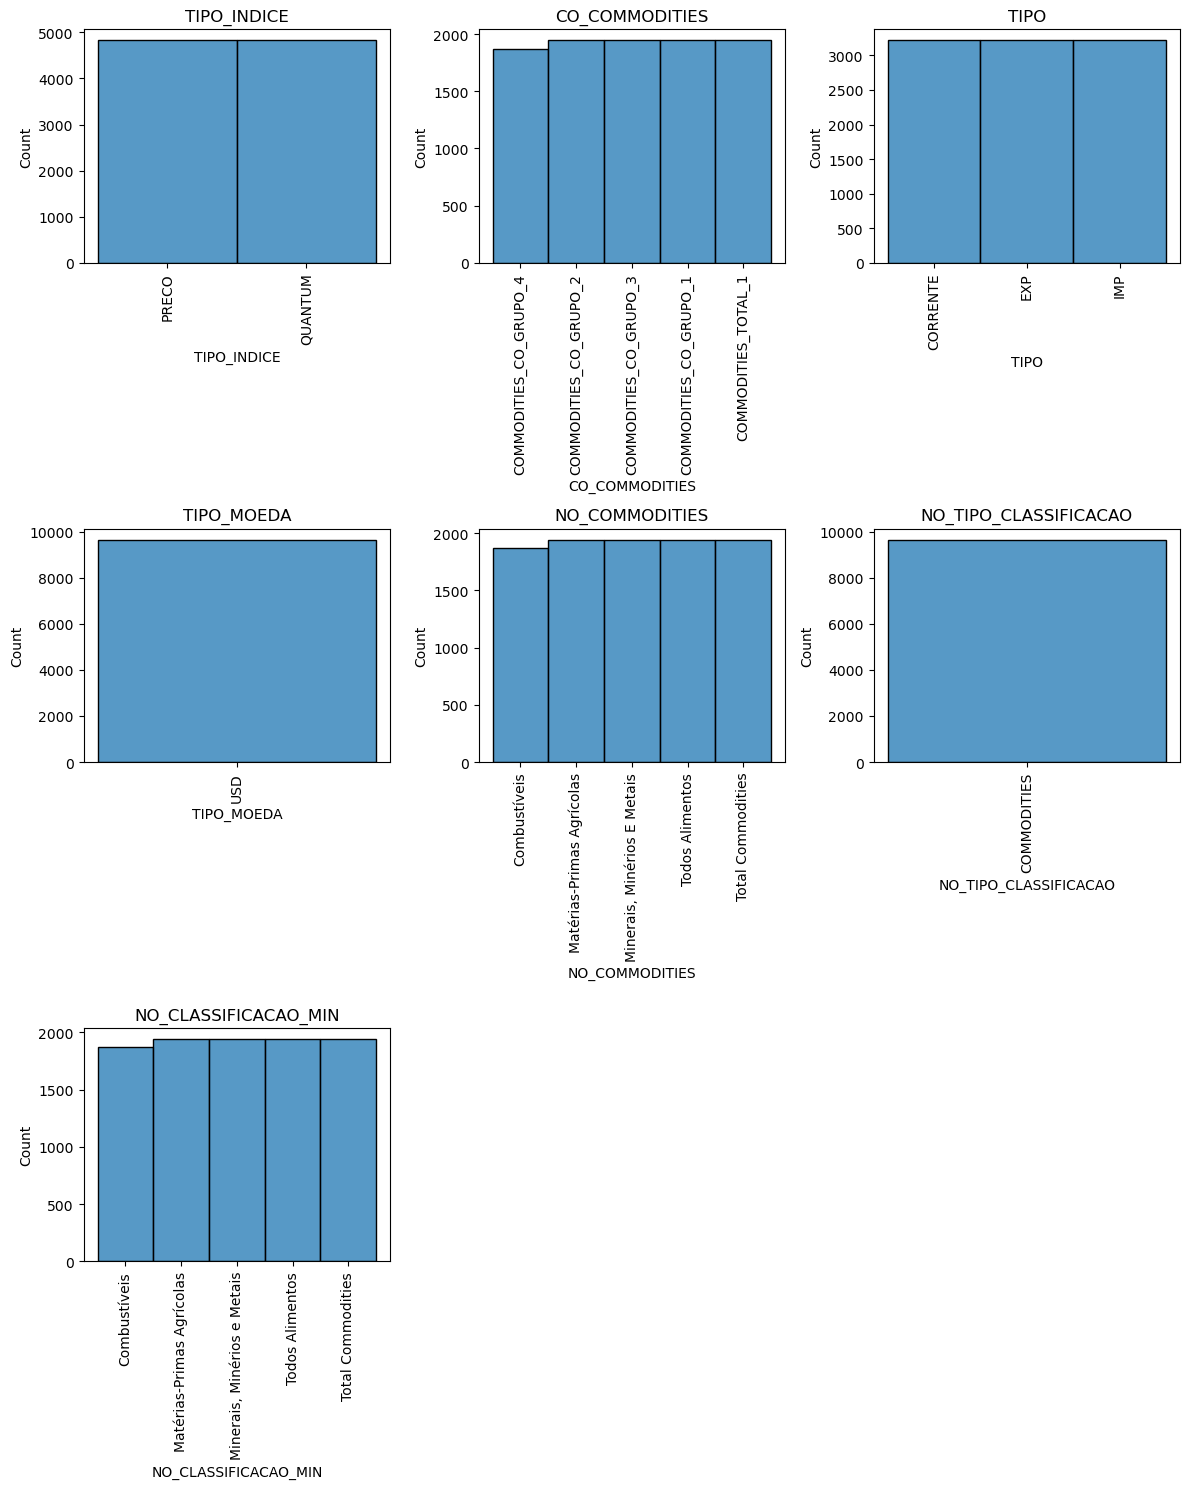

In [10]:
plt.figure(figsize=(12, 15))

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], fill=True)
    plt.title(f'{col}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [11]:
num_cols = get_num_cols(df)

df['INDICE'] = df['INDICE'].str.replace(',', '.').astype(float)
num_cols.append('INDICE')

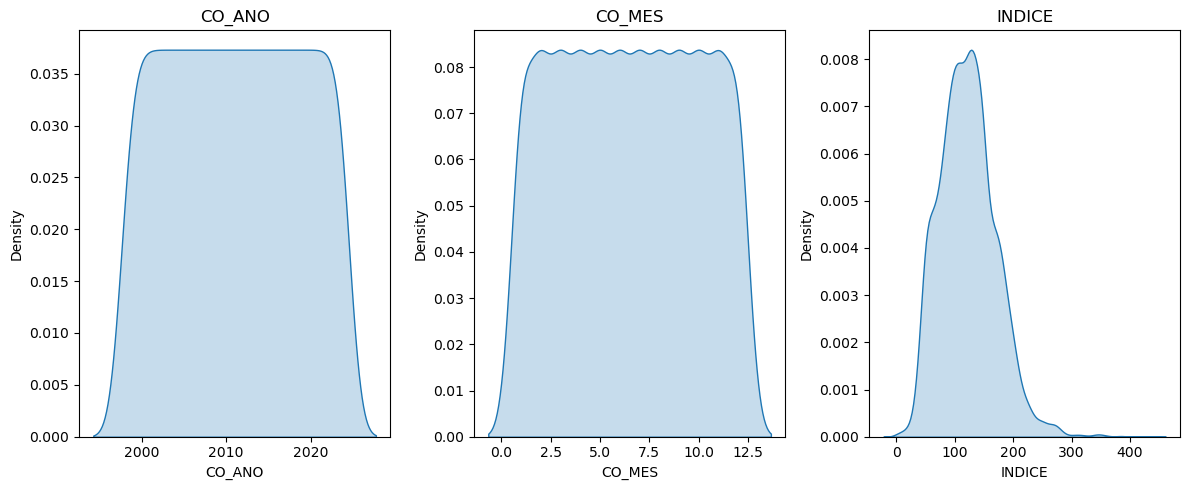

In [12]:
plt.figure(figsize=(12, 5))

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

for i, col in enumerate(num_cols, 1):
  plt.subplot(n_rows, n_cols, i)
  sns.kdeplot(df[col], fill=True)
  plt.title(f'{col}')

plt.tight_layout()
plt.show()

In [13]:
def get_series_by_commodity(df, commodity_col):
  commodities_arr = ['Combustíveis', 'Matérias-Primas Agrícolas', 'Minerais, Minérios E Metais', 'Todos Alimentos', 'Total Commodities']
  dataframes = {commodities: group for commodities, group in df.groupby(commodity_col)}

  return [dataframes[c] for c in commodities_arr if c in dataframes]

In [14]:
df_comb, df_mp, df_mmm, df_ta, df_tc = get_series_by_commodity(df, 'NO_COMMODITIES')

In [15]:
df_comb_corrente_preco = df_comb[df_comb['TIPO'] == 'CORRENTE']
df_comb_corrente_preco = df_comb_corrente_preco[df_comb_corrente_preco['TIPO_INDICE'] == 'PRECO']

In [16]:
df_comb_corrente_preco

,TIPO_INDICE,CO_ANO,CO_MES,CO_COMMODITIES,INDICE,TIPO,TIPO_MOEDA,NO_COMMODITIES,NO_TIPO_CLASSIFICACAO,NO_CLASSIFICACAO_MIN
0,PRECO,2024,12,COMMODITIES_CO_GRUPO_4,119.998771,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis
30,PRECO,2024,11,COMMODITIES_CO_GRUPO_4,133.525710,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis
60,PRECO,2024,10,COMMODITIES_CO_GRUPO_4,129.845814,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis
90,PRECO,2024,9,COMMODITIES_CO_GRUPO_4,137.571992,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis
120,PRECO,2024,8,COMMODITIES_CO_GRUPO_4,138.318988,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis
...,...,...,...,...,...,...,...,...,...,...
9210,PRECO,1999,5,COMMODITIES_CO_GRUPO_4,27.421553,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis
9240,PRECO,1999,4,COMMODITIES_CO_GRUPO_4,23.823082,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis
9270,PRECO,1999,3,COMMODITIES_CO_GRUPO_4,21.889423,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis
9300,PRECO,1999,2,COMMODITIES_CO_GRUPO_4,21.990503,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis


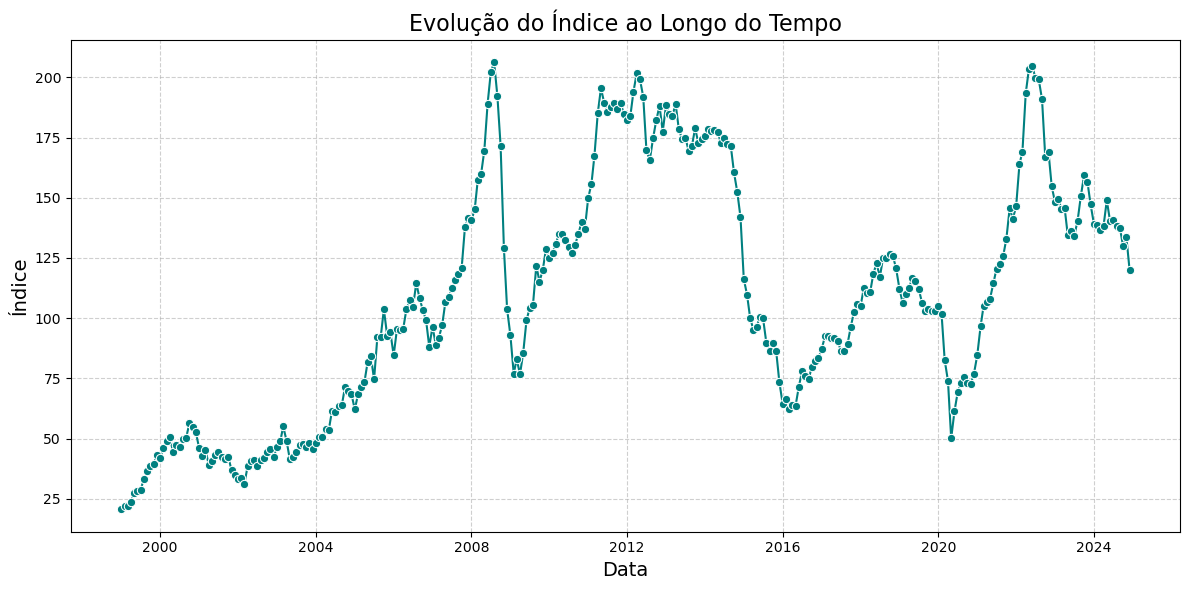

,TIPO_INDICE,CO_ANO,CO_MES,CO_COMMODITIES,INDICE,TIPO,TIPO_MOEDA,NO_COMMODITIES,NO_TIPO_CLASSIFICACAO,NO_CLASSIFICACAO_MIN,DATA
9330,PRECO,1999,1,COMMODITIES_CO_GRUPO_4,20.572681,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis,1999-01-01
9300,PRECO,1999,2,COMMODITIES_CO_GRUPO_4,21.990503,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis,1999-02-01
9270,PRECO,1999,3,COMMODITIES_CO_GRUPO_4,21.889423,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis,1999-03-01
9240,PRECO,1999,4,COMMODITIES_CO_GRUPO_4,23.823082,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis,1999-04-01
9210,PRECO,1999,5,COMMODITIES_CO_GRUPO_4,27.421553,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis,1999-05-01
...,...,...,...,...,...,...,...,...,...,...,...
120,PRECO,2024,8,COMMODITIES_CO_GRUPO_4,138.318988,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis,2024-08-01
90,PRECO,2024,9,COMMODITIES_CO_GRUPO_4,137.571992,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis,2024-09-01
60,PRECO,2024,10,COMMODITIES_CO_GRUPO_4,129.845814,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis,2024-10-01
30,PRECO,2024,11,COMMODITIES_CO_GRUPO_4,133.525710,CORRENTE,USD,Combustíveis,COMMODITIES,Combustíveis,2024-11-01


In [17]:
df_comb_corrente_preco['DATA'] = pd.to_datetime(df_comb_corrente_preco['CO_ANO'].astype(str) + '-' + df_comb_corrente_preco['CO_MES'].astype(str) + '-01')
df_comb_corrente_preco = df_comb_corrente_preco.sort_values('DATA')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_comb_corrente_preco, x='DATA', y='INDICE', marker='o', color='teal')
plt.title('Evolução do Índice ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Índice', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

df_comb_corrente_preco

In [3]:
df2 = pd.read_csv('../data/soja-valor-da-produo-mil-reais.csv')

In [4]:
df2

,Soja - Valor da produção (Mil Reais),Unnamed: 1,Unnamed: 2
0,periodos,valor,NaN
1,2019,125.270.163,NaN
2,2020,169.132.781,NaN
3,2021,340.835.793,NaN
4,2022,347.273.883,NaN
5,2023,348.661.338,NaN
6,Fonte: PAM,NaN,NaN
7,NaN,NaN,NaN


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Soja - Valor da produção (Mil Reais)  7 non-null      object 
 1   Unnamed: 1                            6 non-null      object 
 2   Unnamed: 2                            0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 320.0+ bytes
